In [1]:
#卷积神经网络可以分为两部分
#1 图像的特征提取
##包括卷积层1，池化层1，卷积层2，池化层2
#2 完全连接的神经网络
#包含平坦层，隐藏层，输出层

In [2]:
#卷积层的意义是原本一个图像经过卷积运算产生多个图像，好像相片叠加起来
 #因为使用多个卷积核，所以产生多个图像
#缩减采样的好处
 # 减少需处理的数据点；让图像位置差异变小；参数的数量和计算量下降

In [3]:
#导入所需模块
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [4]:
#读取 mnist数据
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
#将feature转化为四维矩阵
x_train4D= x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test4D=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')


In [7]:
#将feature标准化
x_train4D_normalize=x_train4D/255
x_test4D_normalize=x_test4D/255

In [8]:
#label以One-hot encoding
y_trainonehot=np_utils.to_categorical(y_train)
y_testonehot=np_utils.to_categorical(y_test)

In [9]:
######################
#建立模型

In [10]:
#导入所需模块
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [11]:
#建立 keras的Sequential模型
model=Sequential()


In [12]:
#建立卷积层1和池化层1
#一个完整的卷积运算包含一个卷积层和一个池化层
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',#此设置让卷积运算产生的卷积图像大小不变
                 input_shape=(28,28,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
#建立卷积层2和池化层2
model.add(Conv2D(filters=36,###？？？？？作用在16个上还是作用在1个上，为什么有36个卷积核就会出36张图片
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Dropout(0.25))#放弃25%的神经元，避免过拟合

In [15]:
#建立神经网络平坦层，隐藏层，输出层
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
#输出层
model.add(Dense(10,activation='softmax'))


In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [17]:
#进行训练
#使用反向传播算法进行训练


In [18]:
#定义训练方式
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
#开始训练
train_history=model.fit(x=x_train4D_normalize,
                        y=y_trainonehot,
                        validation_split=0.2,
                        epochs=10,
                        batch_size=300,
                        verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 22s - loss: 0.4106 - acc: 0.8742 - val_loss: 0.0957 - val_acc: 0.9722
Epoch 2/10
 - 22s - loss: 0.1055 - acc: 0.9680 - val_loss: 0.0606 - val_acc: 0.9818
Epoch 3/10
 - 22s - loss: 0.0766 - acc: 0.9759 - val_loss: 0.0464 - val_acc: 0.9863
Epoch 4/10
 - 21s - loss: 0.0626 - acc: 0.9808 - val_loss: 0.0465 - val_acc: 0.9859
Epoch 5/10
 - 21s - loss: 0.0517 - acc: 0.9839 - val_loss: 0.0385 - val_acc: 0.9885
Epoch 6/10
 - 21s - loss: 0.0456 - acc: 0.9857 - val_loss: 0.0371 - val_acc: 0.9893
Epoch 7/10
 - 21s - loss: 0.0395 - acc: 0.9872 - val_loss: 0.0378 - val_acc: 0.9895
Epoch 8/10
 - 21s - loss: 0.0364 - acc: 0.9880 - val_loss: 0.0332 - val_acc: 0.9899
Epoch 9/10
 - 21s - loss: 0.0310 - acc: 0.9900 - val_loss: 0.0305 - val_acc: 0.9909
Epoch 10/10
 - 21s - loss: 0.0270 - acc: 0.9913 - val_loss: 0.0352 - val_acc: 0.9903


In [22]:
#建立show_train_history显示训练过程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper left')#显示图例，位置在左上角
    plt.show()

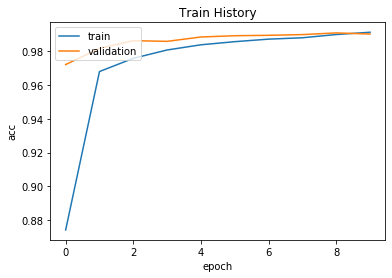

In [24]:
#画出准确率执行结果
show_train_history(train_history,'acc','val_acc')

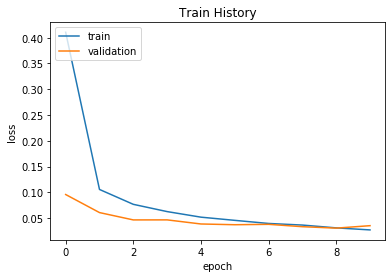

In [26]:
#画出误差执行结果
show_train_history(train_history,'loss','val_loss')


In [27]:
#评估模型准确率
scores=model.evaluate(x_test4D_normalize,y_testonehot)
scores[1]

10000/10000 [==============================] - 2s 169us/step


0.9907

In [28]:
#进行预测
prediction=model.predict_classes(x_test4D_normalize)

10000/10000 [==============================] - 1s 148us/step


In [29]:
#预测结果
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [30]:
#查看多项训练数据image和label
#创建plot_images_labels_prediction 函数，显示多项
import matplotlib.pyplot as plt
#num要显示的数据项数，默认是10，不超过25
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    #设置显示图像大小
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title='label='+str(labels[idx])
        #如果传入了预测结果
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        #设置标题                
        ax.set_title(title,fontsize=10)
        #设置不显示刻度
        ax.set_xticks([]);ax.set_yticks([])
        #读取下一项
        idx+=1
    plt.show()
        

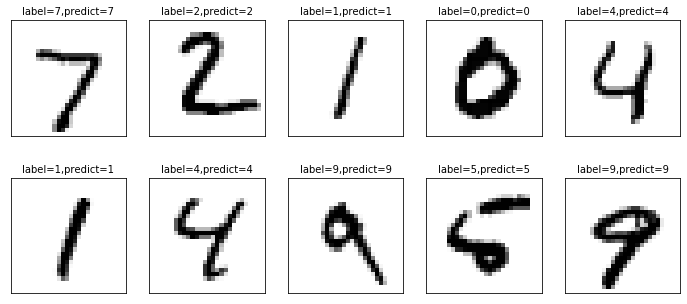

In [31]:
#显示前十项预测结果
plot_images_labels_prediction(x_test,y_test,prediction,idx=0)

In [32]:
#显示混淆矩阵
import pandas as pd
pd.crosstab(y_test,prediction,
            rownames=['label'],
            colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,1,1,0,0
1,0,1133,1,0,0,1,0,0,0,0
2,4,1,1021,0,1,0,0,4,1,0
3,0,0,0,1004,0,3,0,1,2,0
4,0,0,0,0,977,0,1,0,1,3
5,2,0,0,4,0,883,2,0,0,1
6,5,2,0,0,3,1,947,0,0,0
7,0,3,1,0,0,0,0,1021,1,2
8,5,0,3,2,0,1,2,2,955,4
